In [2]:
#Importing modules needed for use for this task
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import missingno

import matplotlib.pyplot as plt
%matplotlib inline



hospital_df = pd.read_csv("South African Hospitals Survey 2011-2012.csv")
#Viewing the first 5 rows of the dataset
hospital_df.head()

,uid,name,facility,classification,district,sub_district,fax,tel,cel,email,...,governance-Staff_welfare_and_employee_wellness,governance-Human_resource_management_and_development,governance-Leadership_and_Corporate_Governance,governance-Operational_Management,governance-Oversight_and_accountability,governance-Financial_management,governance-Risk_management,governance-Supply_chain_and_asset_Management,governance-Quality_Improvement,governance-Effective_leadership
0,ec_aberdeen_hospital_2013_03_26,Aberdeen Hospital,Aberdeen Hospital,DISTRICT HOSPITAL,Cacadu District Municipality,Camdeboo Health sub-District,049 846 0176,049 8460 497/630,083 9830 876,mxolisi.vanqa@impilo.ecprov.gov.za,...,NaN,69.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,ec_addo_clinic_2013_09_18,Addo Clinic,Addo Clinic,SATELLITE CLINIC,Cacadu District Municipality,Kouga Health sub-District,042 233 0358,042 233 0358,082 519 7111,NaN,...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ec_adelaide_gateway_clinic_2013_09_17,Adelaide Gateway Clinic,Adelaide Gateway Clinic,CLINIC,Amathole District Municipality,Nkonkobe Health sub-District,0466840417,0466840066,0789950107,NaN,...,0.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ec_adelaide_hospital_2013_03_26,Adelaide Hospital,Adelaide Hospital,DISTRICT HOSPITAL,Amathole District Municipality,Nkonkobe Health sub-District,0466840417,0466840066,0826377326,adelhospmmn@bosberg.co.za,...,NaN,60.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,ec_aeroville_clinic_2013_09_18,Aeroville Clinic,Aeroville Clinic,CLINIC,Cacadu District Municipality,Camdeboo Health sub-District,042 243 3071,042 243 3446,NaN,NaN,...,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Studying the dataset

In [3]:
hospital_df.shape

(1000, 134)

In [4]:
#Getting the number of missing data points per column
missing_values_count = hospital_df.isnull().sum()

#The number of missing points in all columns
missing_values_count[:20]

#As we can see below, the dataset has got a lot of missing data

uid                      0
name                     0
facility                 0
classification           1
district                 0
sub_district             0
fax                    537
tel                    172
cel                    161
email                  764
manager                  9
area_type                1
ownership               14
postal_area             50
postal_address         138
street_address         111
Location 1               0
overall_performance      0
vital_measures           0
extreme_measures         0
dtype: int64

### Data Cleansing

In [5]:
#Using drop function to delete columns that that have more missing values
new_hospital_df = hospital_df.drop(['sub_district','fax', 'tel', 'cel','email', 'manager', 'postal_address', 'street_address','extreme_measures',
'developmental_measures', 'leadership_and_corporate_governance', 'accommodation-consulting_room-clinic', 'accommodation-procedure_room-total', 'accommodation-consulting-room-outpatient-department',
'accommodation-consulting_room-accident_and_emergency_department', 'accommodation-medicine_room-number_of'], axis=1)


In [6]:
#Displaying unwanted columns
new_hospital_df.columns[25:]

Index(['staff-Nursing_Staff-Professional_Nurse-part_time',
       'staff-Nursing_Staff-Professional_Nurse-full_time',
       'staff-Nursing_Staff-Enrolled_Nurse_Assistant-vacant',
       'staff-Nursing_Staff-Enrolled_Nurse_Assistant-part_time',
       'staff-Nursing_Staff-Enrolled_Nurse_Assistant-full_time',
       'staff-Clinical_staff-Other-vacant',
       'staff-Clinical_staff-Other-part_time',
       'staff-Clinical_staff-Other-full_time',
       'staff-Nursing_Staff-Enrolled_Nurs-vacant',
       'staff-Nursing_Staff-Enrolled_Nurs-part_time',
       'staff-Nursing_Staff-Enrolled_Nurs-full_time',
       'staff-Nursing_Staff-Enrolled_Nurse-vacant',
       'staff-Nursing_Staff-Enrolled_Nurse-part_time',
       'staff-Nursing_Staff-Enrolled_Nurse-full_time',
       'staff-Nursing_Staff-Advanced_Midwives-vacant',
       'staff-Nursing_Staff-Advanced_Midwives-part_time',
       'staff-Nursing_Staff-Advanced_Midwives-full_time',
       'staff-Nursing_Staff-Specialised_Nurses_(Exluding_Adv

In [7]:
#Using drop function to delete columns that are uneccesary for this task 
new_hospital_df = new_hospital_df.drop(new_hospital_df.columns[[25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,
92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117]], axis = 1)

new_hospital_df.head()

,uid,name,facility,classification,district,area_type,ownership,postal_area,Location 1,overall_performance,...,operational_management,patients_rights,public_health,infection_prevention_and_control,improve_patient_safety_and_security,waiting_times,positive_and_caring_attitudes,cleanliness,availability_of_medicines_and_supplies,staff-nursing_staff-professional_nurse-vacant
0,ec_aberdeen_hospital_2013_03_26,Aberdeen Hospital,Aberdeen Hospital,DISTRICT HOSPITAL,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Aberdeen,"Eastern Cape Province\n(-32.473958, 24.054372)",54,...,41.0,50.0,37,49,53,32.0,58.0,55.0,70.0,2.0
1,ec_addo_clinic_2013_09_18,Addo Clinic,Addo Clinic,SATELLITE CLINIC,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Addo,"Eastern Cape Province\n(-33.546594, 25.68993)",45,...,71.0,28.0,80,51,40,20.0,36.0,78.0,64.0,0.0
2,ec_adelaide_gateway_clinic_2013_09_17,Adelaide Gateway Clinic,Adelaide Gateway Clinic,CLINIC,Amathole District Municipality,URBAN,Facility Owner - Government - Prov,"Adelaide,","Eastern Cape Province\n(-32.69994, 26.29404)",40,...,50.0,36.0,33,72,25,57.0,49.0,27.0,32.0,1.0
3,ec_adelaide_hospital_2013_03_26,Adelaide Hospital,Adelaide Hospital,DISTRICT HOSPITAL,Amathole District Municipality,RURAL,Facility Owner - Government - Prov,"Adelaide,","Eastern Cape Province\n(-32.70092, 26.29427)",67,...,62.0,68.0,57,71,60,63.0,70.0,53.0,87.0,3.0
4,ec_aeroville_clinic_2013_09_18,Aeroville Clinic,Aeroville Clinic,CLINIC,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Somerset East,"Eastern Cape Province\n(-32.750808, 25.601076)",60,...,57.0,69.0,47,61,43,64.0,86.0,64.0,90.0,1.0


In [8]:
len(new_hospital_df['Location 1'].unique())

990

In [9]:
#Cheking column location
new_hospital_df['Location 1']
#Creating a list to use whilst cleaning location 1 column as it has unwanted numbers.
hospital_list = []
#Using for loop to access only provinces in column location and append to the list
for i in new_hospital_df['Location 1']:
    splitted_line = i.split('\n')
    hospital_list.append(splitted_line[0])



In [10]:
#Replacing the contents in column 1 with the list items
new_hospital_df['Location 1'] = hospital_list
new_hospital_df.head()

,uid,name,facility,classification,district,area_type,ownership,postal_area,Location 1,overall_performance,...,operational_management,patients_rights,public_health,infection_prevention_and_control,improve_patient_safety_and_security,waiting_times,positive_and_caring_attitudes,cleanliness,availability_of_medicines_and_supplies,staff-nursing_staff-professional_nurse-vacant
0,ec_aberdeen_hospital_2013_03_26,Aberdeen Hospital,Aberdeen Hospital,DISTRICT HOSPITAL,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Aberdeen,Eastern Cape Province,54,...,41.0,50.0,37,49,53,32.0,58.0,55.0,70.0,2.0
1,ec_addo_clinic_2013_09_18,Addo Clinic,Addo Clinic,SATELLITE CLINIC,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Addo,Eastern Cape Province,45,...,71.0,28.0,80,51,40,20.0,36.0,78.0,64.0,0.0
2,ec_adelaide_gateway_clinic_2013_09_17,Adelaide Gateway Clinic,Adelaide Gateway Clinic,CLINIC,Amathole District Municipality,URBAN,Facility Owner - Government - Prov,"Adelaide,",Eastern Cape Province,40,...,50.0,36.0,33,72,25,57.0,49.0,27.0,32.0,1.0
3,ec_adelaide_hospital_2013_03_26,Adelaide Hospital,Adelaide Hospital,DISTRICT HOSPITAL,Amathole District Municipality,RURAL,Facility Owner - Government - Prov,"Adelaide,",Eastern Cape Province,67,...,62.0,68.0,57,71,60,63.0,70.0,53.0,87.0,3.0
4,ec_aeroville_clinic_2013_09_18,Aeroville Clinic,Aeroville Clinic,CLINIC,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Somerset East,Eastern Cape Province,60,...,57.0,69.0,47,61,43,64.0,86.0,64.0,90.0,1.0


In [11]:
new_hospital_df.shape

(1000, 25)

In [12]:
#Getting the number of missing data points per column
missing_values_count = new_hospital_df.isnull().sum()

#The number of missing points in all columns
missing_values_count[:]

uid                                                  0
name                                                 0
facility                                             0
classification                                       1
district                                             0
area_type                                            1
ownership                                           14
postal_area                                         50
Location 1                                           0
overall_performance                                  0
vital_measures                                       0
essential_measures                                   0
facilities_and_infrastructure                        0
clinical_support_services                            1
patient_safety-clinical_governance-clinical_care     0
operational_management                               1
patients_rights                                      1
public_health                                        0
infection_

In [13]:
#Using drop function to delete unneccesary columns 
new_hospital_df = new_hospital_df.drop(['staff-nursing_staff-professional_nurse-vacant','postal_area', 'uid'], axis=1)
new_hospital_df.head()

,name,facility,classification,district,area_type,ownership,Location 1,overall_performance,vital_measures,essential_measures,...,patient_safety-clinical_governance-clinical_care,operational_management,patients_rights,public_health,infection_prevention_and_control,improve_patient_safety_and_security,waiting_times,positive_and_caring_attitudes,cleanliness,availability_of_medicines_and_supplies
0,Aberdeen Hospital,Aberdeen Hospital,DISTRICT HOSPITAL,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Eastern Cape Province,54,53,54,...,58,41.0,50.0,37,49,53,32.0,58.0,55.0,70.0
1,Addo Clinic,Addo Clinic,SATELLITE CLINIC,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Eastern Cape Province,45,47,45,...,34,71.0,28.0,80,51,40,20.0,36.0,78.0,64.0
2,Adelaide Gateway Clinic,Adelaide Gateway Clinic,CLINIC,Amathole District Municipality,URBAN,Facility Owner - Government - Prov,Eastern Cape Province,40,34,43,...,47,50.0,36.0,33,72,25,57.0,49.0,27.0,32.0
3,Adelaide Hospital,Adelaide Hospital,DISTRICT HOSPITAL,Amathole District Municipality,RURAL,Facility Owner - Government - Prov,Eastern Cape Province,67,70,65,...,65,62.0,68.0,57,71,60,63.0,70.0,53.0,87.0
4,Aeroville Clinic,Aeroville Clinic,CLINIC,Cacadu District Municipality,RURAL,Facility Owner - Government - Prov,Eastern Cape Province,60,63,58,...,56,57.0,69.0,47,61,43,64.0,86.0,64.0,90.0


In [14]:
#Least performing hospitals and clinics
# Sorting in ascending order by column 'overall_performance'
new_hospital_df.sort_values(by=['overall_performance'])

#We see that only clinics are appearing in the least performing hosplitals/clinics and Eastern Cape province has the most number 
#of clinics which did not perform well.

,name,facility,classification,district,area_type,ownership,Location 1,overall_performance,vital_measures,essential_measures,...,patient_safety-clinical_governance-clinical_care,operational_management,patients_rights,public_health,infection_prevention_and_control,improve_patient_safety_and_security,waiting_times,positive_and_caring_attitudes,cleanliness,availability_of_medicines_and_supplies
169,Gompo A Ndende Clinic,Gompo A Ndende Clinic,CLINIC,Buffalo City Metropolitan Municipality,URBAN,Facility Owner - Government - Prov,Eastern Cape Province,13,15,13,...,13,12.0,11.0,0,17,10,15.0,25.0,9.0,12.0
679,Hydropark Clinic,Hydropark Clinic,CLINIC,Xhariep District Municipality,RURAL,Facility Owner - Government - Local,Free State Province,15,15,16,...,19,0.0,19.0,0,32,2,33.0,15.0,15.0,11.0
67,Braelyn Clinic,Braelyn Clinic,CLINIC,Buffalo City Metropolitan Municipality,URBAN,Facility Owner - Government - Prov,Eastern Cape Province,15,16,14,...,12,12.0,20.0,0,6,14,0.0,28.0,1.0,41.0
332,Lutubeni Clinic,Lutubeni Clinic,CLINIC,Oliver Tambo District Municipality,RURAL,Facility Owner - Government - Prov,Eastern Cape Province,15,15,16,...,12,0.0,19.0,0,5,15,20.0,15.0,0.0,39.0
442,Moore Street Clinic,Moore Street Clinic,CLINIC,Buffalo City Metropolitan Municipality,URBAN,Facility Owner - Government - Prov,Eastern Cape Province,16,12,17,...,15,12.0,23.0,0,14,10,7.0,34.0,16.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,East Lynne Clinic,East Lynne Clinic,CLINIC,City of Tshwane Metropolitan Municipality,URBAN,Facility Owner - Government - Local,Gauteng Province,91,93,90,...,92,100.0,93.0,61,92,87,87.0,98.0,100.0,94.0
844,Universitas (C) Hospital,Universitas (C) Hospital,CENTRAL HOSPITAL,Mangaung Metropolitan Municipality,URBAN,Facility Owner - Government - Prov,Free State Province,92,95,90,...,97,96.0,83.0,76,94,94,79.0,92.0,73.0,95.0
647,Dihlabeng Hospital,Dihlabeng Hospital,REGIONAL HOSPITAL,Thabo Mofutsanyane District Municipality,RURAL,Facility Owner - Government - Prov,Free State Province,94,95,92,...,96,100.0,90.0,86,98,92,88.0,94.0,81.0,98.0
947,Eldoraigne Satellite Clinic,Eldoraigne Satellite Clinic,SATELLITE CLINIC,City of Tshwane Metropolitan Municipality,URBAN,Facility Owner - Government - Local,Gauteng Province,98,96,99,...,97,100.0,100.0,94,98,97,93.0,100.0,100.0,NaN


Text(0.5, 0, 'Area Type')

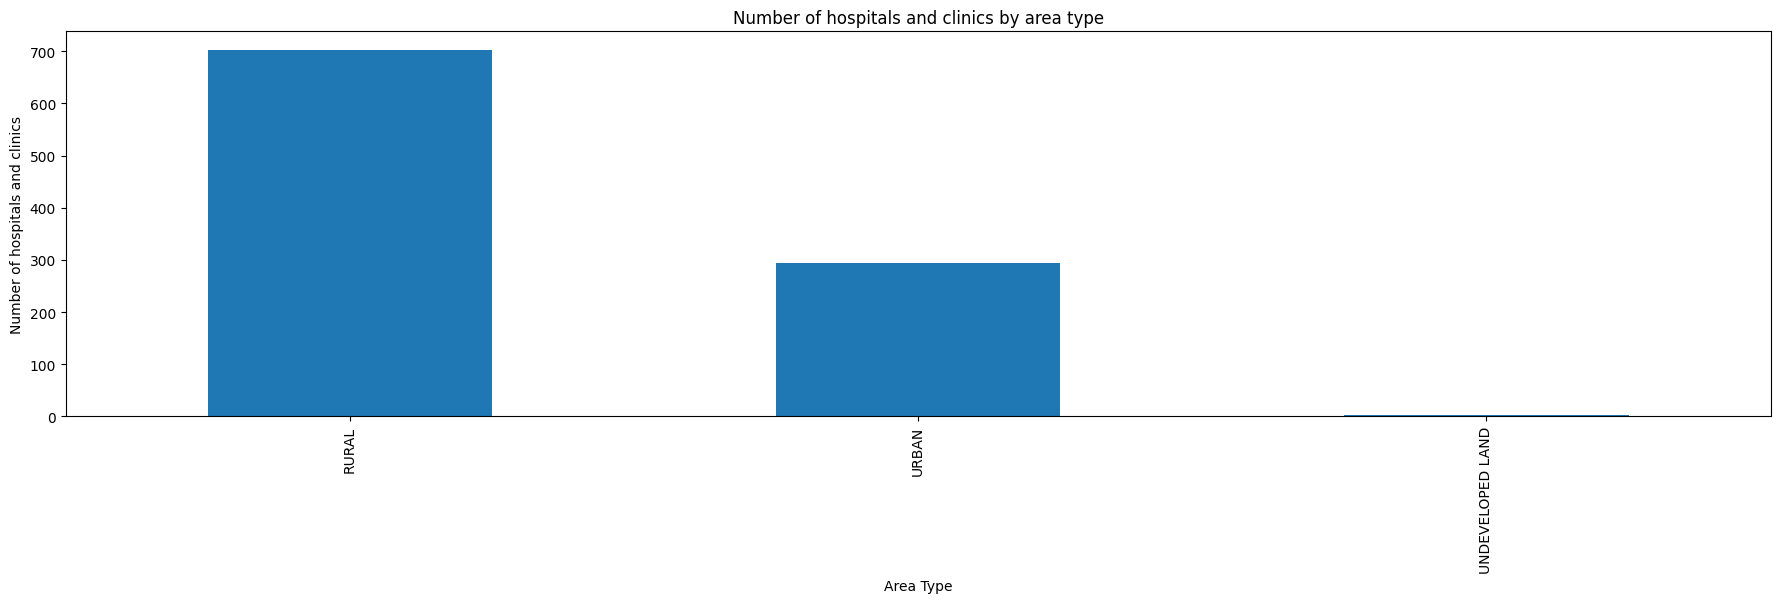

In [15]:
new_hospital_df.area_type.value_counts().nlargest(40).plot(kind='bar', figsize=(22,5))
plt.title("Number of hospitals and clinics by area type")
plt.ylabel('Number of hospitals and clinics')
plt.xlabel('Area Type')

#The below graph shows that there are more rural hospitals and clinics which took part in the survey than urban and undeveloped land

<Figure size 640x480 with 0 Axes>

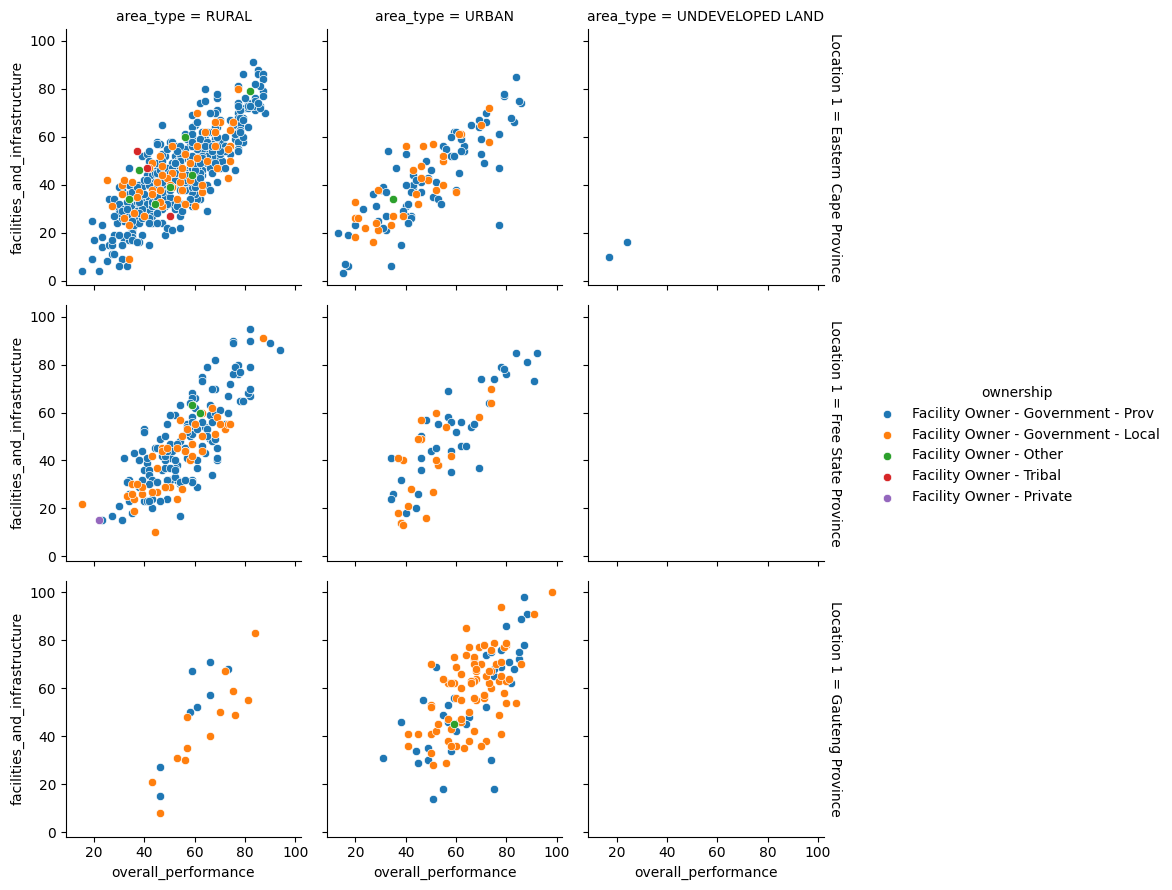

In [16]:
#Plotting a multi-plot grid
plt.figure()
fg = sns.FacetGrid(new_hospital_df, row="Location 1", col="area_type", hue="ownership",
margin_titles=True)
fg.map(sns.scatterplot, "overall_performance", "facilities_and_infrastructure")
fg.add_legend()
plt.show()
plt.close()

array([<AxesSubplot: ylabel='Location 1'>], dtype=object)

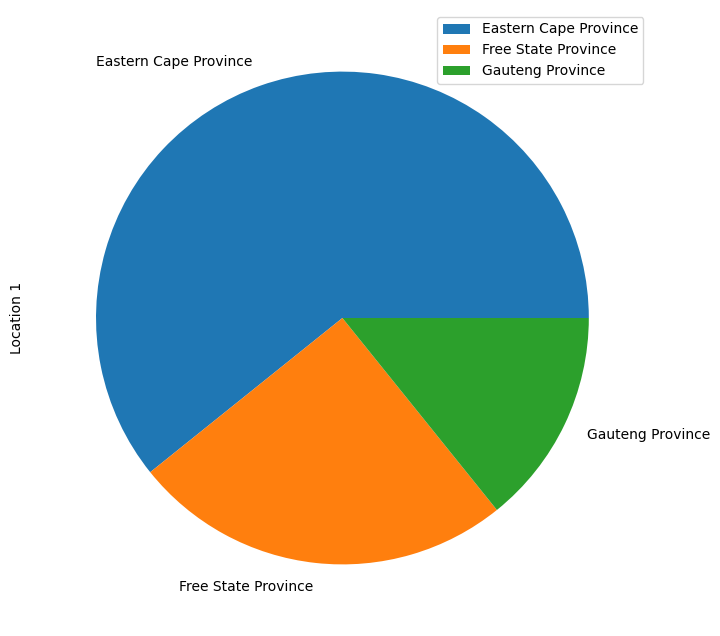

In [18]:
#Plotting a pie chart. Grouping by location
group_by_location = new_hospital_df.groupby(by=['Location 1'])

location_count = group_by_location.count()

location_count = pd.DataFrame(location_count.iloc[:,-4])

location_count.rename(columns={'waiting_times':'Location 1'}, inplace=True)

location_count.plot.pie(subplots=True,figsize=(8, 8))

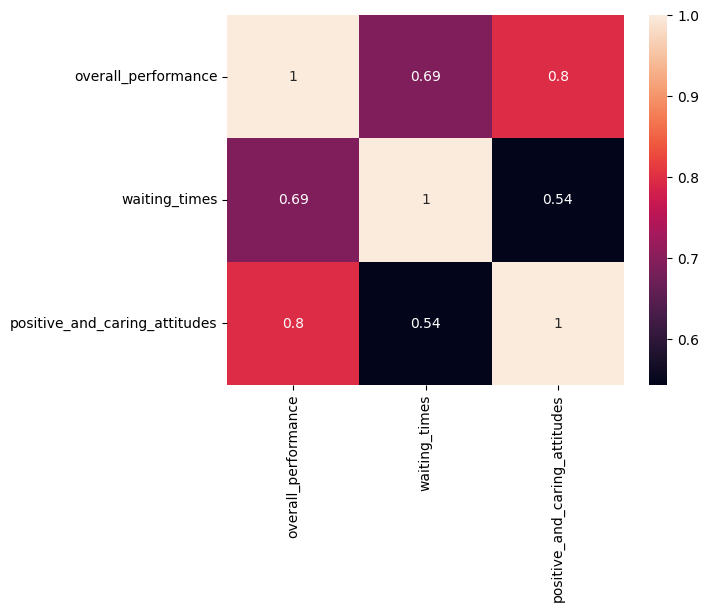

In [20]:
#Plotting a heat map to see the relationship between overall performance, waiting times and positive and caring attitudes 
performance_time_care = new_hospital_df[['overall_performance', 'waiting_times', 'positive_and_caring_attitudes']]
plt.figure()
corr_coeff_mat = performance_time_care.corr()
sns.heatmap(corr_coeff_mat, annot=True)
plt.show()
plt.close()